In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# RANSAC

We can filter matches between keypoints in two images using the Random Sample Consensus (RANSAC) algorithm. 

RANSAC works roughly as follows:
- Estimate parameters of a model on some random subset of the data.
- Do that several times.
- Solution = average solutions obtained.

This works if  there is a homography transformation between the two images. We calculate first the homography and we can filter out the matches that obbey the homography transformation.

### 1. Load images and create a matcher

In [2]:
img0 = cv2.imread('../opencv-np-workshop/data/img/nemo.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('../opencv-np-workshop/data/img/nemo-rotated.jpg', cv2.IMREAD_GRAYSCALE)

detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches = matcher.match(fea0, fea1)

### 2. Find the homography model

In [3]:
pts0 = np.float32([kps0[m.queryIdx].pt for m in matches]).reshape(-1,2)
pts1 = np.float32([kps1[m.trainIdx].pt for m in matches]).reshape(-1,2)
H, mask = cv2.findHomography(pts0, pts1, cv2.RANSAC, 3.0) #last argument = internal RANSAC param

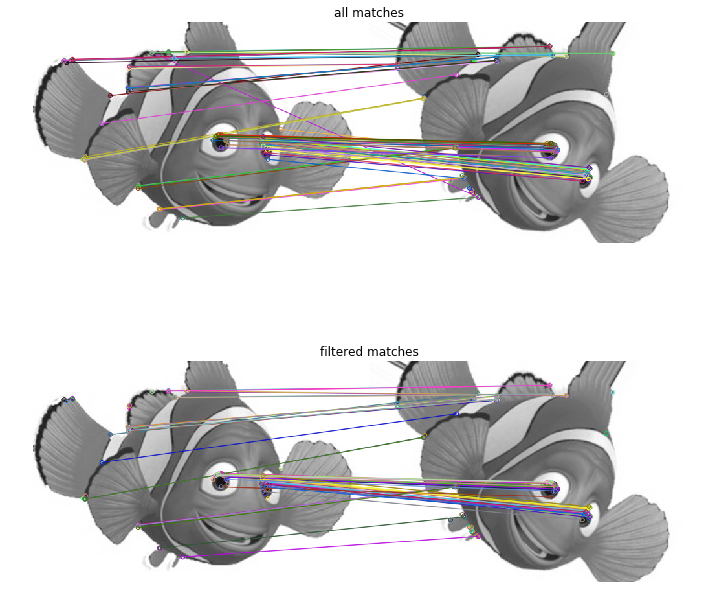

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.axis('off')
plt.title('all matches')
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, matches, None)
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.subplot(212)
plt.axis('off')
plt.title('filtered matches')
dbg_img = cv2.drawMatches(
    img0, kps0, 
    img1, kps1, 
    [m for i,m in enumerate(matches) if mask[i]], 
    None)
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()

In [8]:
matches[0].distance

30.0

In [10]:
sorted([m.distance for m in matches])[:10]

[8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 11.0, 11.0, 11.0]